What quarterbacks do I want to see age analysis. 
1. Tom Brady
2. Peyton Manning
3. Aaron Rodgers
4. Ben Roethlisberger

To-do list:
1. Pull in data from 1999 on
2. passing player filter
3. group by player, epa, season; agg on epa
4. pull in headshot photos

In [52]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import nflfastpy as nfl
import requests # we're going to use this to make a HTTP request for player headshots
from io import BytesIO # we're going to use this to load image data

In [32]:
data = pd.concat([nfl.load_pbp_data(season).assign(season=season) for season in range(1999, 2021)])

In [153]:
data1 = data.loc[(data['passer_player_name']=='P.Manning') | (data['passer_player_name']=='T.Brady')|(data['passer_player_name']=='A.Rodgers')|(data['passer_player_name']=='B.Roethlisberger')|(data['passer_player_name']=='E.Manning')|(data['passer_player_name']=='J.Flacco')|(data['passer_player_name']=='C.Newton')|(data['passer_player_name']=='P.Rivers')|(data['passer_player_name']=='C.Palmer')|(data['passer_player_name']=='D.Brees')]

In [99]:
data1

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
209,205,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,1.790189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,233,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-0.423891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,322,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,1.434317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,346,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-0.446819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,391,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-1.795079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48451,2891,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-0.478984,NaN,NaN,NaN,NaN,NaN,0.354682,64.531824
48452,2915,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-0.696506,0.430300,2.087992,0.0,0.997911,0.499870,0.557932,44.206792
48476,3448,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,0.622538,1.066562,6.756434,5.0,0.654692,0.470271,0.449922,55.007833
48479,3516,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-1.491008,0.818856,8.291892,5.0,1.000000,1.000000,0.262431,73.756939


In [100]:
colors = pd.read_csv('Teams.csv')

In [154]:
data2 = data1.merge(colors[['team_color', 'team_abbr']].rename(columns={'team_abbr': 'posteam'}), on='posteam')

In [102]:
roster_df = nfl.load_roster_data(2015)

In [103]:
roster_df['first_name'] = roster_df['first_name'].str[:1]
roster_df['name'] = roster_df['first_name'] + '.' + roster_df['last_name']

In [155]:
data3 = data2.merge(roster_df[['headshot_url', 'name']], on='name')

In [265]:
df = data3.groupby(['season','passer_player_name', 'team_color', 'headshot_url'], as_index=False).agg({'qb_epa': ['sum']})

In [266]:
df.columns = ['season', 'name', 'team_color', 'headshot_url', 'epa']


/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

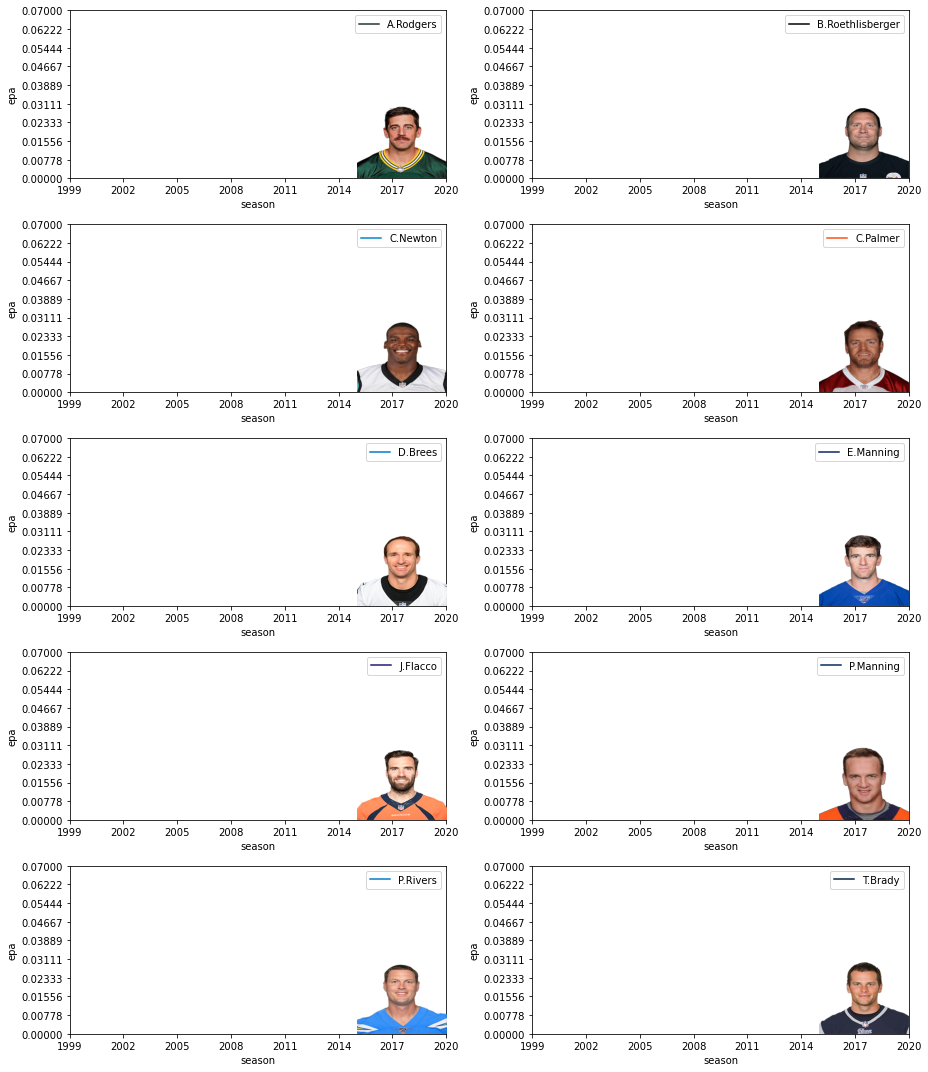

In [267]:
groups = [group for group in df.groupby('name')]

# 5 rows, 2 columns
fig, axes = plt.subplots(5, 2, figsize=(13, 15))

rows, columns = axes.shape[0], axes.shape[1]

i = 0

for row in range(rows):
  for col in range(columns):

    # get the df object
    df = groups[i][-1]

    player_name = df['name'].values[0]

    primary_color = df['team_color'].values[0]

    headshot_url = df['headshot_url'].values[0]

    # make a HTTP request to grab the player image
    response = requests.get(headshot_url)

    # load the image as bytecode
    img = plt.imread(BytesIO(response.content))

    # plot a KDE plot of the player's air yards on the row, col ax and color it with the player's team color
    ax = sns.lineplot(df['epa'], ax=axes[row, col], label=player_name, color=primary_color)

    ax.set_aspect('auto')
    
    lines = ax.get_lines()[0].get_xydata()

    x, y = lines[:, 0], lines[:, 1]

    #extent argument left, right, bottom, top
    ax.imshow(img, extent=[2015, 2020, 0, 0.03], aspect='auto', zorder=1000)

    #fill the area underneath the curve
    #ax.fill_between(x, y, color=primary_color, alpha=0.4)
    
    ax.set_xticks(range(1999, 2021, 3))
    
    ax.set_yticks(np.linspace(0, 0.07, 10))

    ax.set_xlabel('season')

    ax.set_ylabel('epa')
    

    #show us the legend
    ax.legend()

    i += 1

#there's a lot of graphs
plt.tight_layout();